In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
from scipy.optimize import curve_fit
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

In [2]:
def fit_exponent(t,T0,t0,ΔT1,τ1,ΔT2,τ2):
    exp1 = (t-t0)/τ1
    exp2 = (t-t0)/τ2
    result = np.where(
        t < t0,
        T0,
        T0 + ΔT1 * (1 - np.exp(-exp1)) + ΔT2 * (1 - np.exp(-exp2))
    )
    return result

def fit_single_exponent(t,T0,t0,ΔT,τ):
    exp = (t-t0)/τ
    result = np.where(
        t < t0,
        T0,
        T0 + ΔT * (1 - np.exp(-exp))
    )
    return result

In [3]:
SHEETS = ['50mW','50mW2','210mW','210mW2','410mW','410mW2','620mW','850mW','1000mW2','1000mW3','Foglio8','Foglio10','1000mW1'] # 1000mW1 è quello per il doppio esponenziale

results = []

for sheet in SHEETS:
    data = pd.read_excel('./data/gruppo1_termocamera.xlsx', sheet_name=sheet, header=12, skiprows=['A', 'B', 'C'])
    t = data['Base tempo relativa'].to_numpy()
    T = data['Sp1.Valore'].to_numpy()
    
    if sheet != '210mW2' and sheet != '210mW' and sheet != '620mW':
        popt, pcov = curve_fit(
            fit_exponent, t, T, 
            p0=[25, 5, 10, 50, 10, 500], 
            bounds=(0, np.inf),  # Ensure all parameters are positive
            maxfev=5000
        )
        T0, t0, DeltaT1, tau1, DeltaT2, tau2 = popt
        sigmaT0, sigmat0, sigmaDelta1, sigmatau1, sigmaDeltaT2, sigmatau2 = np.sqrt(np.diag(pcov))

    else:
        popt, pcov = curve_fit(
            fit_single_exponent, t, T, 
            p0=[25, 50, 10, 50], 
            bounds=(0, np.inf),  # Ensure all parameters are positive
            maxfev=5000
        )
        T0, t0, DeltaT1, tau1 = popt
        sigmaT0, sigmat0, sigmaDelta1, sigmatau1 = np.sqrt(np.diag(pcov))
        DeltaT2 = 0
        sigmaDeltaT2 = 0
        tau2 = 0
        sigmatau2 = 0

    
    results.append({
        'Sheet': sheet,
        'ΔT TOTALE': DeltaT1 + DeltaT2,
        'sigmaΔT TOTALE': np.sqrt(sigmaDelta1**2 + sigmaDeltaT2**2),
        'T0': T0,
        't0': t0,
        'DeltaT1': DeltaT1,
        'tau': tau1,
        'sigmaT0': sigmaT0,
        'sigmat0': sigmat0,
        'sigmaDelta1': sigmaDelta1,
        'sigmatau1': sigmatau1,
        'DeltaT2': DeltaT2,
        'tau2': tau2,
        'sigmaDeltaT2': sigmaDeltaT2,
        'sigmatau2': sigmatau2
    })

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame(results)

display(results_df)

,Sheet,ΔT TOTALE,sigmaΔT TOTALE,T0,t0,DeltaT1,tau,sigmaT0,sigmat0,sigmaDelta1,sigmatau1,DeltaT2,tau2,sigmaDeltaT2,sigmatau2
0,50mW,2.689378,0.198080,25.617624,36.967086,0.438706,18.098346,0.004487,0.281056,0.150419,4.669188,2.250672e+00,66.895795,0.128879,4.558357
1,50mW2,2.274732,55.632341,25.720746,35.864961,2.274732,33.695367,0.004393,0.170278,0.019281,0.537925,1.600853e-09,516255.726927,55.632338,0.000000
2,210mW,12.648969,0.014259,25.293602,30.783940,12.648969,50.243030,0.010259,0.083484,0.014259,0.165217,0.000000e+00,0.000000,0.000000,0.000000
3,210mW2,12.644465,0.012310,25.296021,40.356614,12.644465,50.284898,0.008122,0.072325,0.012310,0.151365,0.000000e+00,0.000000,0.000000,0.000000
4,410mW,25.734512,0.375756,25.383884,38.708351,12.452238,25.834601,0.004941,0.028695,0.315722,0.404529,1.328227e+01,103.427732,0.203746,3.658113
5,410mW2,25.087959,0.200865,25.556359,24.548543,8.911546,22.594252,0.006038,0.028021,0.148819,0.278345,1.617641e+01,77.592171,0.134907,0.611438
6,620mW,33.668404,0.042363,25.690254,38.503492,33.668404,37.375947,0.005623,0.018656,0.042363,0.100101,0.000000e+00,0.000000,0.000000,0.000000
7,850mW,41.937842,0.409543,26.027764,30.788866,18.012405,23.515785,0.007607,0.021887,0.314818,0.267442,2.392544e+01,83.329473,0.261945,1.149303
8,1000mW2,41.600101,0.332143,25.597370,33.426427,16.891275,22.950893,0.006602,0.019949,0.248999,0.228034,2.470883e+01,77.929039,0.219814,0.714858
9,1000mW3,41.937842,0.409543,26.027764,30.788866,18.012405,23.515785,0.007607,0.021887,0.314818,0.267442,2.392544e+01,83.329473,0.261945,1.149303


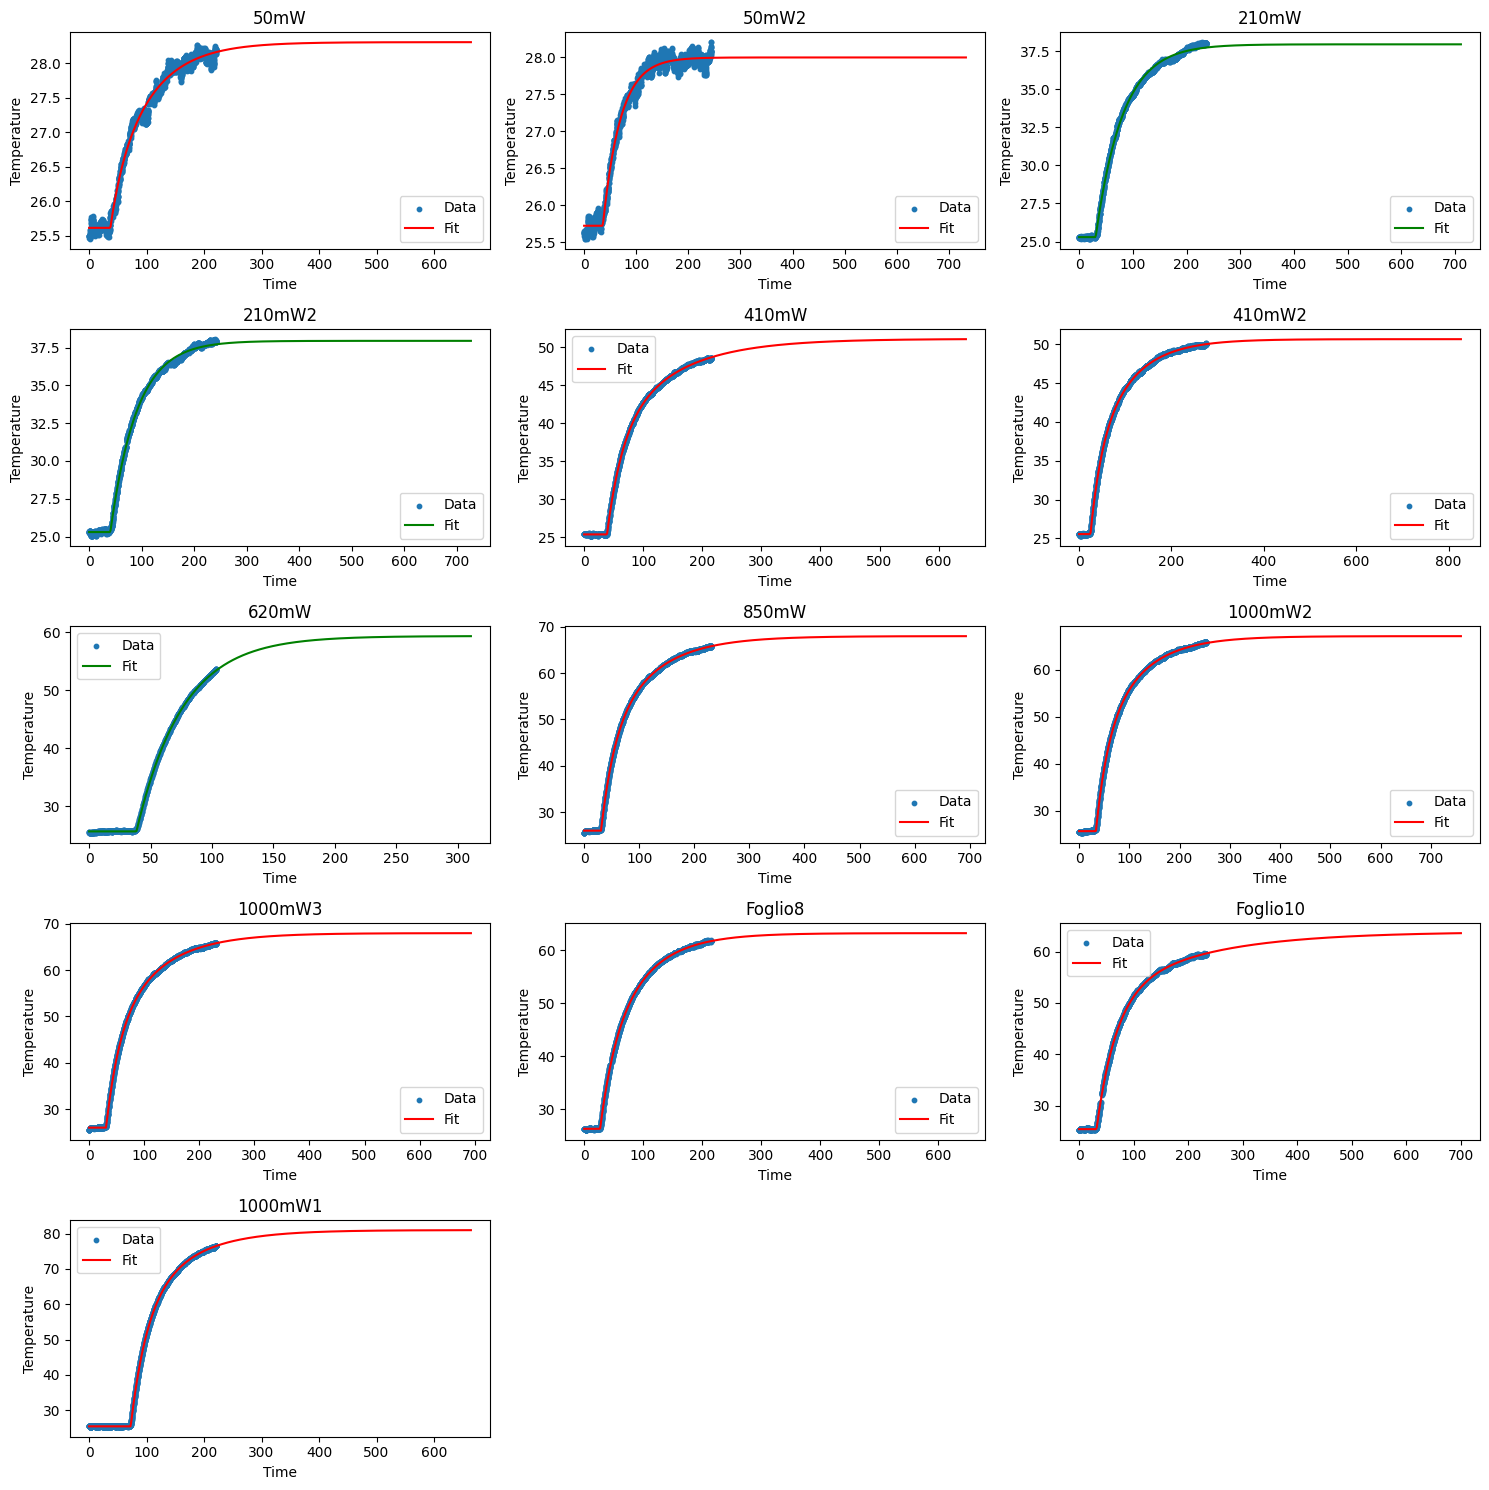

In [7]:
# Plot all the fits
plt.figure(figsize=(15, 15))  # Adjusted figure size for a 5x3 grid

for i, sheet in enumerate(SHEETS):
    data = pd.read_excel('./data/gruppo1_termocamera.xlsx', sheet_name=sheet, header=12, skiprows=['A', 'B', 'C'])
    t = data['Base tempo relativa'].to_numpy()
    T = data['Sp1.Valore'].to_numpy()
    
    # Retrieve the fit parameters for the current sheet
    params = results_df.loc[results_df['Sheet'] == sheet]
    T0, t0, DeltaT1, tau1 = params[['T0', 't0', 'DeltaT1', 'tau']].values[0]
    DeltaT2, tau2 = params[['DeltaT2', 'tau2']].values[0]
    
    # Generate the fitted curve
    t_fit = np.linspace(t.min(), t.max()*3, 500)
    if sheet != '210mW2' and sheet != '210mW' and sheet != '620mW':
        T_fit = fit_exponent(t_fit, T0, t0, DeltaT1, tau1, DeltaT2, tau2)
    else:
        T_fit = fit_single_exponent(t_fit, T0, t0, DeltaT1, tau1)
    
    # Plot the data and the fit
    plt.subplot(5, 3, i + 1)  # Adjusted to a 5x3 grid
    plt.scatter(t, T, label='Data', s=10)
    color = 'red' if sheet != '210mW2' and sheet != '210mW' and sheet != '620mW' else 'green'
    plt.plot(t_fit, T_fit, label='Fit', color=color)
    plt.title(sheet)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()

plt.tight_layout()
plt.show()